I am trying to estimate the claims made by insurees to their insurance company based on the policy holder's age, sex, weight(kg), BMI, number of dependents, smoking status, blood pressure, diabetes status, regular exercise status, city, and hereditary dieases status.

In [40]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [42]:
# Import Data

costs = pd.read_csv('https://raw.githubusercontent.com/naseemdabiran/CIS_9660/main/health_insurance.csv')
costs

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,male,49,28.3,NoDisease,1,1,Florence,54,1,0,FilmMaker,21082.2
14996,39.0,male,74,29.6,NoDisease,4,0,Miami,64,1,0,Student,7512.3
14997,20.0,male,62,33.3,NoDisease,0,0,Tampa,52,1,0,FashionDesigner,1391.5
14998,52.0,male,88,36.7,NoDisease,0,0,PanamaCity,70,1,0,Farmer,9144.6


In [3]:
# First five rows 
costs.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [4]:
# Columns in Data Frame
costs.columns

Index(['age', 'sex', 'weight', 'bmi', 'hereditary_diseases',
       'no_of_dependents', 'smoker', 'city', 'bloodpressure', 'diabetes',
       'regular_ex', 'job_title', 'claim'],
      dtype='object')

In [5]:
# Size of Data Frame
costs.shape

(15000, 13)

In [6]:
# Summarize Data Frame
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [7]:
# Check if there are null values
costs.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [8]:
# Drop all nulls
costs = costs.dropna()

In [9]:
# Summary statistics of claim

costs.claim.describe()

count    13648.000000
mean     13416.465050
std      12080.022325
min       1121.900000
25%       4889.000000
50%       9715.800000
75%      16450.900000
max      63770.400000
Name: claim, dtype: float64

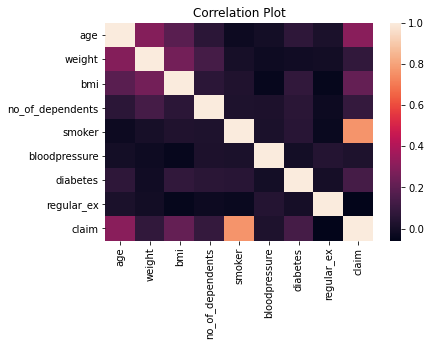

In [10]:
# Correlation Matrix

sns.heatmap(costs.corr())
plt.title('Correlation Plot')
plt.show()

While the heat map does not show much correlation between variables, the categorical data may affect the value of claims made by policy holders more than some of the numerical data. For example, sex and hereditary diseases may play a larger role in claim  

In [11]:
# Distribution of sex
costs.sex.value_counts()

female    7000
male      6648
Name: sex, dtype: int64

In [12]:
# Distribution of hereditary diseases
costs.hereditary_diseases.value_counts()

NoDisease       12761
Alzheimer         134
Diabetes          127
EyeDisease        121
Obesity           108
Cancer             96
HeartDisease       93
Arthritis          79
High BP            69
Epilepsy           60
Name: hereditary_diseases, dtype: int64

In [13]:
# Distribution of cities
costs.city.value_counts()

Nashville     276
Memphis       273
NewOrleans    269
Charlotte     268
Charleston    264
             ... 
Trenton        64
Baltimore      63
York           61
Warwick        61
Syracuse       60
Name: city, Length: 91, dtype: int64

In [14]:
# Distribution of job titles
costs.job_title.value_counts()

Student              1153
HomeMakers            916
Singer                677
FilmMaker             670
Actor                 648
HouseKeeper           625
Dancer                621
Manager               585
Photographer          362
Beautician            353
ITProfessional        333
Accountant            333
Police                332
Engineer              331
Politician            326
Clerks                324
FashionDesigner       319
DataScientist         316
CEO                   309
Architect             302
Lawyer                285
Blogger               280
Doctor                275
FilmDirector          273
Technician            272
DefencePersonnels     272
CA                    267
Chef                  261
Journalist            255
Academician           251
GovEmployee           246
Analyst               241
Buisnessman           215
Labourer              210
Farmer                210
Name: job_title, dtype: int64

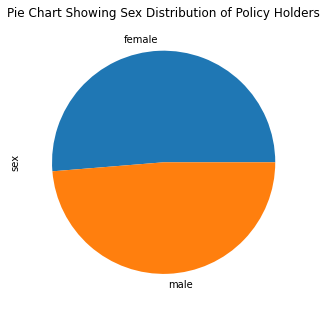

In [15]:
#Plotting the distribution of the Sex of Policy Holders
count = costs.sex.value_counts()
plt.figure(figsize=(5,10))
count.plot.pie( title = 'Pie Chart Showing Sex Distribution of Policy Holders')
plt.show()

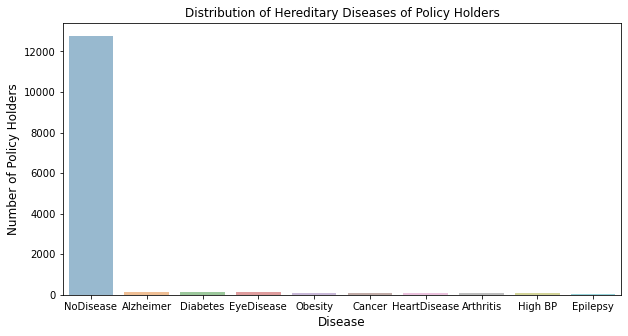

In [16]:
#Plot distribution of hereditary diseases of Policy Holders
count = costs.hereditary_diseases.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x = count.index, y= count.values, alpha=0.5)
plt.title('Distribution of Hereditary Diseases of Policy Holders')
plt.ylabel('Number of Policy Holders', fontsize=12)
plt.xlabel('Disease', fontsize=12)
plt.show()

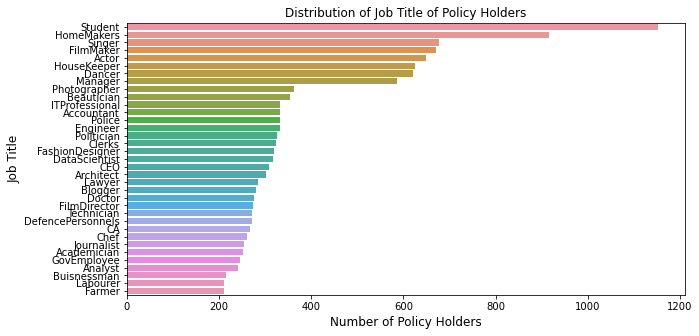

In [17]:
#Plotting the distribution of the Job Titles of Policy Holders
count = costs.job_title.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x= count.values, y = count.index,   alpha=1)
plt.title('Distribution of Job Title of Policy Holders')
plt.ylabel('Job Title', fontsize=12)
plt.xlabel('Number of Policy Holders', fontsize=12)
plt.show()

In [18]:
# One-Hot Encoding of Categorical Column - Sex

sex_encoding = pd.get_dummies(costs['sex'])
sex_encoding

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
14995,0,1
14996,0,1
14997,0,1
14998,0,1


In [19]:
# Drop Original Column And Join New Columns - Sex

costs = costs.drop('sex', axis = 1)
costs = costs.join(sex_encoding)

In [20]:
# One-Hot Encoding of Categorical Column - Hereditary Diseases

hd_encoding = pd.get_dummies(costs['hereditary_diseases'])
hd_encoding

,Alzheimer,Arthritis,Cancer,Diabetes,Epilepsy,EyeDisease,HeartDisease,High BP,NoDisease,Obesity
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0
14998,0,0,0,0,0,0,0,0,1,0


In [21]:
# Drop Original Column And Join New Columns - Hereditary Diseases

costs = costs.drop('hereditary_diseases', axis = 1)
costs = costs.join(hd_encoding)

In [22]:
# One-Hot Encoding of Categorical Column - Job Title

jt_encoding = pd.get_dummies(costs['job_title'])
jt_encoding

,Academician,Accountant,Actor,Analyst,Architect,Beautician,Blogger,Buisnessman,CA,CEO,...,Journalist,Labourer,Lawyer,Manager,Photographer,Police,Politician,Singer,Student,Technician
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Drop Original Column And Join New Columns - Job Title

costs = costs.drop('job_title', axis = 1)
costs = costs.join(jt_encoding)

In [24]:
# One-Hot Encoding of Categorical Column - City

city_encoding = pd.get_dummies(costs['city'])
city_encoding

,Atlanta,AtlanticCity,Bakersfield,Baltimore,Bloomington,Boston,Brimingham,Brookings,Buffalo,Cambridge,...,Syracuse,Tampa,Trenton,Tucson,Warwick,WashingtonDC,Waterloo,Worcester,York,Youngstown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14997,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
14998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
 # Drop Original Column And Join New Columns - City

costs = costs.drop('city', axis = 1)
costs = costs.join(city_encoding)

In [26]:
costs

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim,female,...,Syracuse,Tampa,Trenton,Tucson,Warwick,WashingtonDC,Waterloo,Worcester,York,Youngstown
0,60.0,64,24.3,1,0,72,0,0,13112.6,0,...,0,0,0,0,0,0,0,0,0,0
1,49.0,75,22.6,1,0,78,1,1,9567.0,1,...,0,0,0,0,0,0,0,0,0,0
2,32.0,64,17.8,2,1,88,1,1,32734.2,1,...,0,0,0,0,0,0,0,0,0,0
3,61.0,53,36.4,1,1,72,1,0,48517.6,1,...,0,0,0,0,0,0,0,0,0,0
4,19.0,50,20.6,0,0,82,1,0,1731.7,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,49,28.3,1,1,54,1,0,21082.2,0,...,0,0,0,0,0,0,0,0,0,0
14996,39.0,74,29.6,4,0,64,1,0,7512.3,0,...,0,0,0,0,0,0,0,0,0,0
14997,20.0,62,33.3,0,0,52,1,0,1391.5,0,...,0,1,0,0,0,0,0,0,0,0
14998,52.0,88,36.7,0,0,70,1,0,9144.6,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Separate Data into features and target --> Estimating Claim

x = costs.drop(['claim', 'weight'], axis = 1) #features 
y = costs['claim'] #target

In [28]:
# Features dataframe 
print(x)

        age   bmi  no_of_dependents  smoker  bloodpressure  diabetes  \
0      60.0  24.3                 1       0             72         0   
1      49.0  22.6                 1       0             78         1   
2      32.0  17.8                 2       1             88         1   
3      61.0  36.4                 1       1             72         1   
4      19.0  20.6                 0       0             82         1   
...     ...   ...               ...     ...            ...       ...   
14995  39.0  28.3                 1       1             54         1   
14996  39.0  29.6                 4       0             64         1   
14997  20.0  33.3                 0       0             52         1   
14998  52.0  36.7                 0       0             70         1   
14999  52.0  26.4                 3       0             72         1   

       regular_ex  female  male  Alzheimer  ...  Syracuse  Tampa  Trenton  \
0               0       0     1          0  ...         0 

In [29]:
# Target dataframe/array 
print(y)

0        13112.6
1         9567.0
2        32734.2
3        48517.6
4         1731.7
          ...   
14995    21082.2
14996     7512.3
14997     1391.5
14998     9144.6
14999    25992.8
Name: claim, Length: 13648, dtype: float64


In [30]:
# Split dataset into training and test sets (70/30 ratio)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=2)

In [31]:
# Creating model and fitting on training model

from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [32]:
# Evaluating model

y_pred = LR.predict(x_test)

In [33]:
# Calculating coefficients

coefficients = LR.coef_
print('Coefficients: ' + str(coefficients))

Coefficients: [ 2.63149372e+02  1.90316798e+02  4.75332832e+02  1.94494474e+04
  5.11770057e+00  1.27319494e+03 -9.16035983e+02 -4.52161072e+14
 -4.52161072e+14 -9.23291514e+12 -9.23291515e+12 -9.23291514e+12
 -9.23291515e+12 -9.23291515e+12 -9.23291515e+12 -9.23291514e+12
 -9.23291515e+12 -9.23291516e+12 -9.23291515e+12 -2.41055893e+13
 -2.41055893e+13 -2.41055893e+13 -2.41055893e+13 -2.41055893e+13
 -2.41055893e+13 -2.41055893e+13 -2.41055893e+13 -2.41055893e+13
 -2.41055893e+13 -2.41055893e+13 -2.41055893e+13 -2.41055893e+13
 -2.41055893e+13 -2.41055893e+13 -2.41055893e+13 -2.41055893e+13
 -2.41055893e+13 -2.41055893e+13 -2.41055893e+13 -2.41055893e+13
 -2.41055893e+13 -2.41055893e+13 -2.41055893e+13 -2.41055893e+13
 -2.41055893e+13 -2.41055893e+13 -2.41055893e+13 -2.41055893e+13
 -2.41055893e+13 -2.41055893e+13 -2.41055893e+13 -2.41055893e+13
 -2.41055893e+13 -2.41055893e+13  1.24921784e+13  1.24921784e+13
  1.24921784e+13  1.24921784e+13  1.24921784e+13  1.24921784e+13
  1.2492178

The many coeeficients that are equal are because fo the hot encoding of the categorical data.

In [34]:
# Calculating intercept

intercept = LR.intercept_
print('Intercept: ' +str(intercept))

Intercept: 473007397945877.3


In [35]:
# Calculating R^2

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print('R^2: ' + str(r2))

R^2: 0.7673187009115028


In [36]:
# Calculating Mean Squared Error

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ' + str(mse))

Mean Squared Error: 34085505.76697348


In [37]:
# Calculating Root Mean Squared Error

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error: ' + str(rmse))

Root Mean Squared Error: 5838.279349857583


In [38]:
# Calculating Mean Absolute Error

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ' + str(mae))

Mean Absolute Error: 3826.4434035409035
